<a href="https://colab.research.google.com/github/Kostiantyn-Liapkalo/neural_network_using_keras/blob/Main/hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Частина 1**

---

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

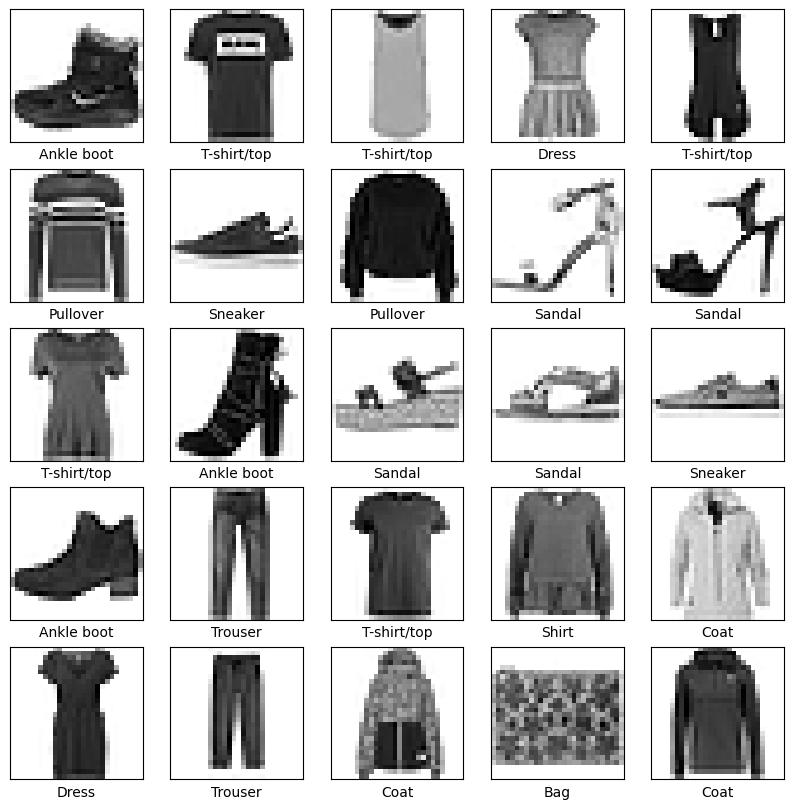

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
num_classes = 10
num_features = 28 * 28 * 1
learning_rate = 0.001
batch_size = 256
epochs = 50


# Приведення типу та нормалізація
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Зміна форми даних
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Створення моделі
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = len(x_train) // batch_size
callbacks = [lr_scheduler, early_stopping]

history = model.fit(train_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks
                    )

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Difference accuracy: {(train_acc - test_acc)*100:.2f}%")

Epoch 1/50
234/234 [==============================] - 264s 1s/step - loss: 0.5994 - accuracy: 0.7876 - val_loss: 2.1415 - val_accuracy: 0.3189 - lr: 0.0010
Epoch 2/50
234/234 [==============================] - 259s 1s/step - loss: 0.3454 - accuracy: 0.8757 - val_loss: 1.9151 - val_accuracy: 0.4866 - lr: 0.0010
Epoch 3/50
234/234 [==============================] - 255s 1s/step - loss: 0.2845 - accuracy: 0.8972 - val_loss: 0.2841 - val_accuracy: 0.8898 - lr: 0.0010
Epoch 4/50
234/234 [==============================] - 255s 1s/step - loss: 0.2529 - accuracy: 0.9082 - val_loss: 0.2972 - val_accuracy: 0.8911 - lr: 0.0010
Epoch 5/50
234/234 [==============================] - 259s 1s/step - loss: 0.2341 - accuracy: 0.9159 - val_loss: 0.2303 - val_accuracy: 0.9156 - lr: 0.0010
Epoch 6/50
234/234 [==============================] - 256s 1s/step - loss: 0.2144 - accuracy: 0.9224 - val_loss: 0.2190 - val_accuracy: 0.9213 - lr: 0.0010
Epoch 7/50
234/234 [==============================] - 258s 1s/st

In [6]:
from sklearn.metrics import classification_report

# Отримання прогнозованих міток для тестового набору
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Звіт про класифікацію
report = classification_report(y_test, predicted_labels, target_names=class_names)
print(report)

313/313 [==============================] - 12s 37ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.91      0.90      1000
     Trouser       1.00      0.99      1.00      1000
    Pullover       0.93      0.91      0.92      1000
       Dress       0.94      0.96      0.95      1000
        Coat       0.90      0.94      0.92      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.86      0.80      0.83      1000
     Sneaker       0.97      0.99      0.98      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



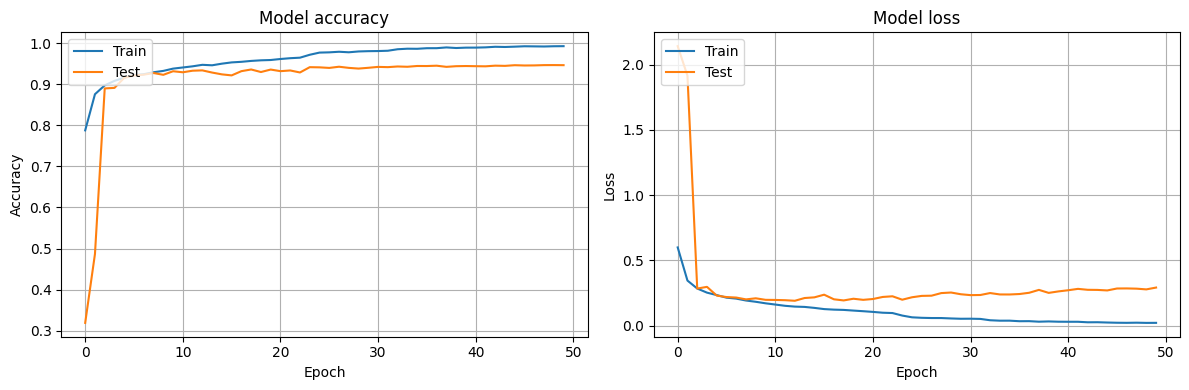

In [7]:
# accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

Висновок

Точність згорткової нейромережі виявилась - 0.9452.

Точність багатошарової мережі - 0.9020.

Порівнюючи точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Точність згорткової нейромережі виявилась більша майже на 4.32%.

# **Частина 2**

В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [8]:
from tensorflow.keras.applications import VGG16


base_model = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

x_train_vgg = np.repeat(x_train, 3, axis=3)
x_train_vgg = tf.image.resize(x_train_vgg, [48, 48])
x_test_vgg = np.repeat(x_test, 3, axis=3)
x_test_vgg = tf.image.resize(x_test_vgg, [48, 48])

x_train_features = base_model.predict(x_train_vgg)
x_test_features = base_model.predict(x_test_vgg)

model_vgg = Sequential()
model_vgg.add(Flatten(input_shape=x_train_features.shape[1:]))
model_vgg.add(Dense(512, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(10, activation='softmax'))

model_vgg.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_vgg = model_vgg.fit(x_train_features, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(x_test_features, y_test),
                            callbacks=callbacks)

train_loss_vgg, train_acc_vgg = model_vgg.evaluate(x_train_features, y_train)
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(x_test_features, y_test)
print(f"\nVGG Train accuracy: {train_acc_vgg:.4f}")
print(f"VGG Test accuracy: {test_acc_vgg:.4f}")
print(f"Difference in accuracy with VGG: {(train_acc_vgg - test_acc_vgg)*100:.2f}%")


313/313 [==============================] - 229s 731ms/step
Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6509 - accuracy: 0.7729 - val_loss: 0.4571 - val_accuracy: 0.8336 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.4389 - accuracy: 0.8417 - val_loss: 0.4158 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3983 - accuracy: 0.8553 - val_loss: 0.3820 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3728 - accuracy: 0.8645 - val_loss: 0.3765 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3580 - accuracy: 0.8687 - val_loss: 0.3617 - val_accuracy: 0.8669 - lr: 0.0010
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3442 - accuracy: 0.8749 - val_loss: 0.3678 - val_accuracy: 0.8672 - lr: 0.0010
Epoch

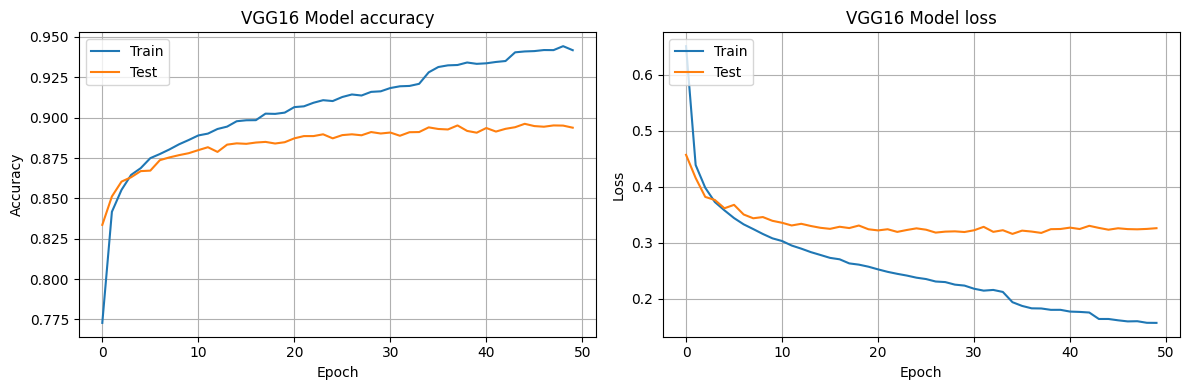

In [10]:
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('VGG16 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Розморожуємо декілька верхніх шарів
for layer in base_model.layers[:-4]:
    layer.trainable = False


model_vgg_ft = Sequential()
model_vgg_ft.add(base_model)
model_vgg_ft.add(Flatten())
model_vgg_ft.add(Dense(512, activation='relu'))
model_vgg_ft.add(Dropout(0.5))
model_vgg_ft.add(Dense(10, activation='softmax'))

model_vgg_ft.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_vgg_ft = model_vgg_ft.fit(x_train_vgg, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(x_test_vgg, y_test),
                                  callbacks=callbacks)

train_loss_vgg_ft, train_acc_vgg_ft = model_vgg_ft.evaluate(x_train_vgg, y_train)
test_loss_vgg_ft, test_acc_vgg_ft = model_vgg_ft.evaluate(x_test_vgg, y_test)
print(f"\nFine-tuned VGG Train accuracy: {train_acc_vgg_ft:.4f}")
print(f"Fine-tuned VGG Test accuracy: {test_acc_vgg_ft:.4f}")
print(f"Difference in accuracy with VGG: {(train_acc_vgg_ft - test_acc_vgg_ft)*100:.2f}%")

In [ ]:
# Отримання прогнозованих міток для тестового набору з VGG16 моделі
predicted_probabilities_vgg = model_vgg_ft.predict(x_test_vgg)
predicted_labels_vgg = np.argmax(predicted_probabilities_vgg, axis=1)

report_vgg = classification_report(y_test, predicted_labels_vgg, target_names=class_names)
print(report_vgg)

In [ ]:
# accuracy values for VGG16
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg_ft.history['accuracy'])
plt.plot(history_vgg_ft.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg_ft.history['loss'])
plt.plot(history_vgg_ft.history['val_loss'])
plt.title('VGG16 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

**Висновок**

Модель на основі VGG16 показала кращий результат порівняно з попередньою моделлю. Це свідчить про ефективність переднавчених моделей. Найкращий результат показала звичайна згорткова мережа з точністтю більше 94 % на тестових даних.